<a href="https://colab.research.google.com/github/explore-thulani/classification-predicts-team4/blob/master/Climate_Change_Team_4_Second_Draft_Notebook_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 4 Climate Change Belief Analysis





## Contents 

1. Introduction
2. Import Libraries 
3. Import Datasets
4. Data cleaning and preprocessing
5. Exploratory data analysis
6. Feature engineering and selection
7. Model building
8. Results interpretation
9. Conclusion

## Introduction

##### Background

Climate change is refered to as the global phenomenon of climate transformation characterized by the changes in the usual climate of the planet . Such Changes could be manifested in form of change in precipitation , temperature and wind magnitudes. These changes are mostly said to be a result of antropogenic activities, and they have brought nothing but misery to both human and natural environment, for instance lot of natural habitant has been destructed from its normal form, wherelse, human complain about rising temperature and cooling of temperatures in other form of the globe.

Due to the misfortune brought by climate change, both governments and comapnies are working together as a collective to try and minimize any activities that can worsen the level of climate change. Hence lot of environmental sustaonability projects are introduced. In this project, we will be evaluating tweets using Classification Machine learning model.

#### Problem Statement

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

#### Objectives 

The aim of this project is to find out if people believe in climate change or not . And this will be done by view people's previous sentiments when it comes to Climate Change. This will give an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic catergories. Thus increasing their insights and informing future marketing strategies.

##### Deliveries

Building a Machine learning model that is able to classify whether or not a person believes in climate change , based on their novel tweet data

# Working Environment Preparation

Before the project could begin , the environment was prepared which means all the  packages that one might needed for statstical evaluation and model building Packages  were installed  and the libraries were also imported. The model was also deployed to comet_ml, which will be furthered explained/elaborated when approached.

# Install Packages

This notebook was designed using the packages below. To install, uncomment the cell and run the pip install on your command environment.

In [ ]:
pip install ???
pip install ???
pip install ???

# Connecting to Comet

Comet provides a self-hosted and cloud-based meta machine learning platform allowing data scientists and teams to track, compare, explain and optimize experiments and models.

In [ ]:
#Deploying the model
from comet_ml import Experiment

In [ ]:
# Api key
experiment = Experiment(api_key="NMdrE2Fvv00bzfhwE99pCjGSq",
                        project_name="team-4-climate-change", workspace="primmk", log_code=True)

COMET INFO: old comet version (3.1.10) detected. current: 3.1.11 please update your comet lib with command: `pip install --no-cache-dir --upgrade comet_ml`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/primmk/team-4-climate-change/83a885dada4a4fcea45a50f70f66d068



# Importing Libraries 

In [ ]:

#Standard Imports
import numpy as np
import pandas as pd
import re

#Visualisations 
import matplotlib.pyplot as plt
import seaborn as sns 
import scikitplot as skplt

#Data Cleaning
from nltk.stem import PorterStemmer
import nltk
from nltk.corpus import stopwords
from textblob import Word


#import dependencies
from gensim.models import word2vec
from sklearn.manifold import TSNE

#import for imbalance
from sklearn.utils import resample


# imports for N- Grams
from sklearn.feature_extraction.text import CountVectorizer


#Modeling
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.svm import LinearSVC
from sklearn.svm import SVC


# Importing Datasets

*   Train dataset - Training the model will be done on this dataset.
*   Test dataset - The model will be tested on this dataset 

In [ ]:
#df_train=pd.read_csv("train.csv")
#df_test =pd.read_csv("test.csv")
df_train=pd.read_csv(r"C:\Users\ramuk\Downloads\climate-change-belief-analysis\train.csv")
df_test =pd.read_csv(r"C:\Users\ramuk\Downloads\climate-change-belief-analysis\test.csv")

In [ ]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [ ]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


# Extracting info from the datasets

The first step that was taken into consideration was to study the data and have a full understanding, before anything could be done with the data. Extraction of the infomation from the datasets includes looking for missing data, ( Which is  the first step that will be taken) and secondly we we had to look if there are any blank spaces or empty strings within the data.Then we learn more about the distribution of the data, where the dependent variable is divided into 4 classes(pro_tweets, anti_tweets, neutral_tweets and news).

##### check for null values 

In [ ]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [ ]:
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

######  Check for blanks 

In [ ]:
blanks = []  # start with an empty list

for i,sen,mes,twe in df_train.itertuples():  # iterate over the DataFrame
    if type(mes)==str:            # avoid NaN values
        if mes.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


###### Check distribution of classes

In [ ]:
# Separate minority and majority classes
pro_tweets = df_train[df_train['sentiment']==1]
anti_tweets = df_train[df_train['sentiment']==-1]
neutral_tweets = df_train[df_train['sentiment']==0]
news=df_train[df_train['sentiment']==2]

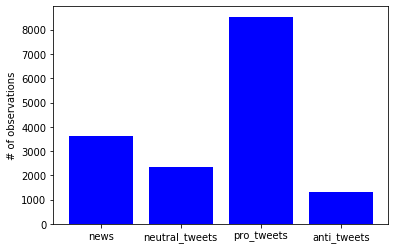

In [ ]:
labels = df_train['sentiment'].unique()
heights = [len(pro_tweets),len(anti_tweets),len(neutral_tweets), len(news)]
plt.bar(labels,heights,color='blue')
plt.xticks(labels,['pro_tweets','anti_tweets','neutral_tweets','news'])
plt.ylabel("# of observations")
plt.show()

In [ ]:
len(pro_tweets)/(len(df_train))

0.5392249826158417

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


### Observations


*   There are 15 819 tweets, all tweets have a unique tweet ID.
*   The sentiment and tweet id columns are of int64 data type and the message column is an object datatype.
*   No null values and no blanks exist within the train dataset.
*   The classes are imbalanced, with the tweeters believing in climate change (pro tweets) having the most count (53% of our data), and the tweeters who do not believe in climate change (anti tweets) having the least count.
*   The imbalance of classes may train our model to only be good at detecting only the pro tweets, therefore having an inaccurate accuracy.
*   Due to the imbalancing of classes we are going to have to either downsample or upsample our minority or majority classes or deploy a model that can work to counteract the imbalancing of classes.

# Data Pre-processing

Pre-processing is the most vital step in classification modelling ,as we all know that at least 90% of the text data of the world data is unstructured, for instance Text can come in a variety of forms from a list of individual words, to sentences to multiple paragraphs with spacial characters.All in all this data is never clean and consists of a lot of noise, therefore,it needs to be treated and then perfomr a few of the pre-processing functions to make sure we have the right input data for the feature enginerring and modeling. Preprocessing involves transforming raw text data into an understable format and this process has proven to have resolved such problems.

##### Lowering all the texts 

In this stage, the data was lowered inorder to have all the words in the same format and maintain consistency. This method will be applied to both the train and test dataset 

In [ ]:
df_train['message'] = df_train['message'].apply(lambda x: " ".join(x.lower()
for x in x.split()))
df_train['message']


0        polyscimajor epa chief doesn't think carbon di...
1        it's not like we lack evidence of anthropogeni...
2        rt @rawstory: researchers say we have three ye...
3        #todayinmaker# wired : 2016 was a pivotal year...
4        rt @soynoviodetodas: it's 2016, and a racist, ...
                               ...                        
15814    rt @ezlusztig: they took down the material on ...
15815    rt @washingtonpost: how climate change could b...
15816    notiven: rt: nytimesworld :what does trump act...
15817    rt @sara8smiles: hey liberals the climate chan...
15818    rt @chet_cannon: .@kurteichenwald's 'climate c...
Name: message, Length: 15819, dtype: object

In [ ]:
df_test['message'] = df_test['message'].apply(lambda x: " ".join(x.lower()
for x in x.split()))
df_test['message']

0        europe will now be looking to china to make su...
1        combine this with the polling of staffers re c...
2        the scary, unimpeachable evidence that climate...
3        @karoli @morgfair @osborneink @dailykos putin ...
4        rt @fakewillmoore: 'female orgasms cause globa...
                               ...                        
10541    rt @brittanybohrer: brb, writing a poem about ...
10542    2016: the year climate change came home: durin...
10543    rt @loop_vanuatu: pacific countries positive a...
10544    rt @xanria_00018: you’re so hot, you must be t...
10545    rt @chloebalaoing: climate change is a global ...
Name: message, Length: 10546, dtype: object

##### Removing Twitter handles 

In [ ]:
# function to remove twitter handles
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [ ]:
df_train['message'] = np.vectorize(remove_pattern)(df_train['message'], "@[\w]*")

In [ ]:
df_train.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn't think carbon di...,625221
1,1,it's not like we lack evidence of anthropogeni...,126103
2,2,rt : researchers say we have three years to ac...,698562
3,1,#todayinmaker# wired : 2016 was a pivotal year...,573736
4,1,"rt : it's 2016, and a racist, sexist, climate ...",466954


In [ ]:
df_test['message'] = np.vectorize(remove_pattern)(df_test['message'], "@[\w]*")

In [ ]:
df_test.head()

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,"the scary, unimpeachable evidence that climate...",224985
3,putin got to you too jill ! trump doesn't ...,476263
4,rt : 'female orgasms cause global warming!' -s...,872928


##### Removing the punctuation

Removing Punctuation will be done, to make sure there are no added extra information or values. The removal of puncuation will help reduce the size of the data and increase computational eeficiency. This method will be applied to both the train and the test dataset .

In [ ]:
#remove punctuation, except for hashtags
df_train['message'] = df_train['message'].str.replace("[^a-zA-Z#]", " ")
df_train['message']


0        polyscimajor epa chief doesn t think carbon di...
1        it s not like we lack evidence of anthropogeni...
2        rt   researchers say we have three years to ac...
3        #todayinmaker# wired        was a pivotal year...
4        rt   it s       and a racist  sexist  climate ...
                               ...                        
15814    rt   they took down the material on global war...
15815    rt   how climate change could be breaking up a...
15816    notiven  rt  nytimesworld  what does trump act...
15817    rt   hey liberals the climate change crap is a...
15818    rt     s  climate change equation  in   screen...
Name: message, Length: 15819, dtype: object

In [ ]:
df_test['message'] = df_test['message'].str.replace("[^a-zA-Z#]", " ")
df_test['message']

0        europe will now be looking to china to make su...
1        combine this with the polling of staffers re c...
2        the scary  unimpeachable evidence that climate...
3            putin got to you too jill   trump doesn t ...
4        rt    female orgasms cause global warming    s...
                               ...                        
10541    rt   brb  writing a poem about climate change ...
10542          the year climate change came home  durin...
10543    rt   pacific countries positive about fiji lea...
10544    rt   you re so hot  you must be the cause for ...
10545    rt   climate change is a global issue that s o...
Name: message, Length: 10546, dtype: object

##### Removing http, url's

In [ ]:
df_train['message'] = df_train['message'].apply(lambda x: re.sub('http[s]?://\S+', '', x))

In [ ]:
df_test['message'] = df_test['message'].apply(lambda x: re.sub('http[s]?://\S+', '', x))

##### Removing short words


In [ ]:
df_train['message'] = df_train['message'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
df_test['message'] = df_test['message'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

##### Removing stopwords

Stopwords are common in most texts and in most cases they dont carry any meaning or they have less meaning compared to the other keywords. For instance , if these words are removed, more focus will be on impontant keywords.

In [ ]:
#remove stop words
stop = stopwords.words('english')
df_train['message'] = df_train['message'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_train['message']

0        polyscimajor chief think carbon dioxide main c...
1          like lack evidence anthropogenic global warming
2        researchers three years climate change late ht...
3        #todayinmaker# wired pivotal year climate chan...
4        racist sexist climate change denying bigot lea...
                               ...                        
15814    took material global warming lgbt rights healt...
15815    climate change could breaking million year rel...
15816    notiven nytimesworld trump actually believe cl...
15817    liberals climate change crap hoax ties #agenda...
15818    climate change equation screenshots https uufcxdq
Name: message, Length: 15819, dtype: object

In [ ]:
stop = stopwords.words('english')
df_test['message'] = df_test['message'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_test['message']

0        europe looking china make sure alone fighting ...
1        combine polling staffers climate change womens...
2        scary unimpeachable evidence climate change al...
3        putin jill trump believe climate change thinks...
4        female orgasms cause global warming sarcastic ...
                               ...                        
10541    writing poem climate change #climatechange #sc...
10542    year climate change came home hottest year rec...
10543    pacific countries positive fiji leading global...
10544          must cause global warming #aldublaboroflove
10545    climate change global issue getting worse eati...
Name: message, Length: 10546, dtype: object

##### Remove news articles


In [ ]:
df_train=df_train[df_train.sentiment != 2]

##### Lemmetization

Lemmatization is a process of extrating a root word by considering the vocabulary. Lemmatization was used instead of stemming because it gives better results 

In [ ]:
#Code for lemmatize
df_train['message'] = df_train['message'].apply(lambda x: " ".join([Word(word).
lemmatize() for word in x.split()]))
df_train['message']

0        polyscimajor chief think carbon dioxide main c...
1          like lack evidence anthropogenic global warming
3        #todayinmaker# wired pivotal year climate chan...
4        racist sexist climate change denying bigot lea...
5        worth read whether believe climate change http...
                               ...                        
15813    head falsely claim carbon emission cause globa...
15814    took material global warming lgbt right health...
15816    notiven nytimesworld trump actually believe cl...
15817    liberal climate change crap hoax tie #agenda c...
15818     climate change equation screenshots http uufcxdq
Name: message, Length: 12179, dtype: object

In [ ]:
df_test['message'] = df_test['message'].apply(lambda x: " ".join([Word(word).
lemmatize() for word in x.split()]))
df_test['message']

0        europe looking china make sure alone fighting ...
1        combine polling staffer climate change woman r...
2        scary unimpeachable evidence climate change al...
3        putin jill trump believe climate change think ...
4        female orgasm cause global warming sarcastic r...
                               ...                        
10541    writing poem climate change #climatechange #sc...
10542    year climate change came home hottest year rec...
10543    pacific country positive fiji leading global c...
10544          must cause global warming #aldublaboroflove
10545    climate change global issue getting worse eati...
Name: message, Length: 10546, dtype: object

# Exploratory Data Analysis

Exploratory Data Analysis is a way of visualizing, summarizing, and interpreting the information that is not obvious or hidden in rows and columns format. The EDA is one of the most essential steps whilst building a model, as it gives insights and statistical measure that is essentila for whatever one is trying to achieve. In this case, this process will help in terms of coming with concepts that will help business in adopting a business strategy that will allow them to be more thoughtful when it comes to sustainable development. And also having a clear understanding with regards to how people think about climate change.

### Wordcloud Visualization(s)

Wordcloud is the pictorial representation of the most frequently repeated words representing the size of the word,(i.e, the bigger the word, means the Word appeared the most )

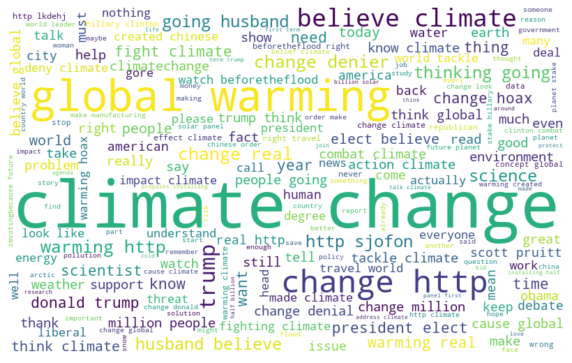

In [ ]:
#Wordcloud for most frequent words in all the tweets
all_words = ' '.join([text for text in df_train['message']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

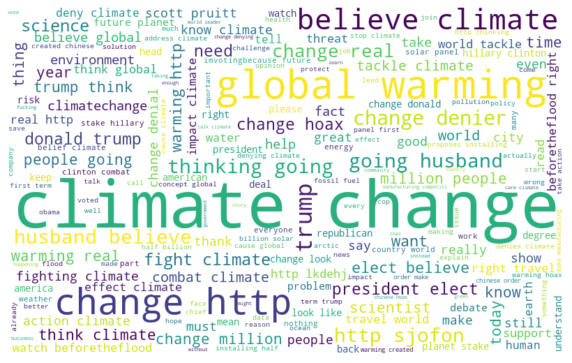

In [ ]:
#Wordcloud for most frequent words in pro climate change tweets
pro_tweets =' '.join([text for text in df_train['message'][df_train['sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(pro_tweets)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

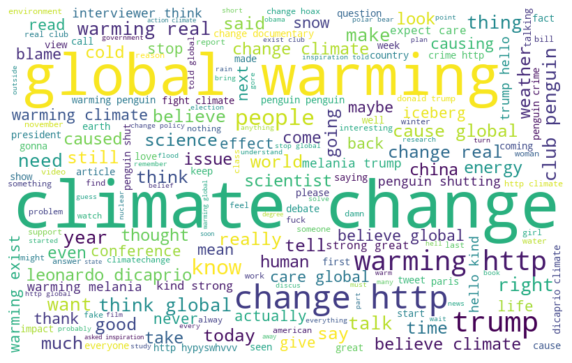

In [ ]:
#Wordcloud for most frequent words in neutral tweets
neutral_tweets =' '.join([text for text in df_train['message'][df_train['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(neutral_tweets)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

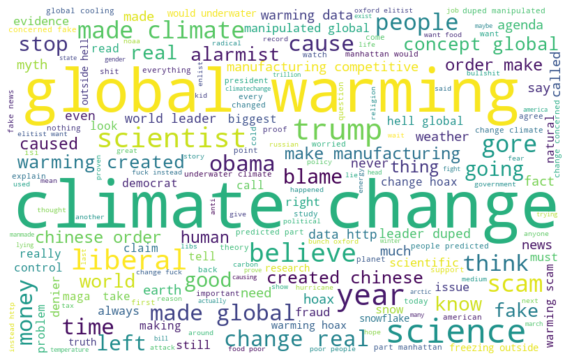

In [ ]:
#Wordcloud for most frequent words in anti climate change tweets
anti_tweets =' '.join([text for text in df_train['message'][df_train['sentiment'] == -1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(anti_tweets)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Observations

* Climate change seems to be the most frequently used word in all the tweet classes.
* There is an overlap in frequest words among the classes, however, not much distinction can be drawn from the wordcloud.
* Since WordCloud does not show how frequently a word appears, we will create a frequent words dictionary with top 20 counts for much better information extrapolation.

### Top 20 Common words

In [ ]:
#extracting tweets for each tweet class
anti_tweets =[text for text in df_train['message'][df_train['sentiment'] == -1]]
pro_tweets=[text for text in df_train['message'][df_train['sentiment'] == 1]]
neutral_tweets = [text for text in df_train['message'][df_train['sentiment'] == 0]]

In [ ]:
#value counts: top 20 most appearing words for each tweet class 
anti_series=pd.Series(' '.join(anti_tweets).split()).value_counts()[:20]
pro_series=pd.Series(' '.join(pro_tweets).split()).value_counts()[:20]
neutral_series = pd.Series(' '.join(neutral_tweets).split()).value_counts()[:20]

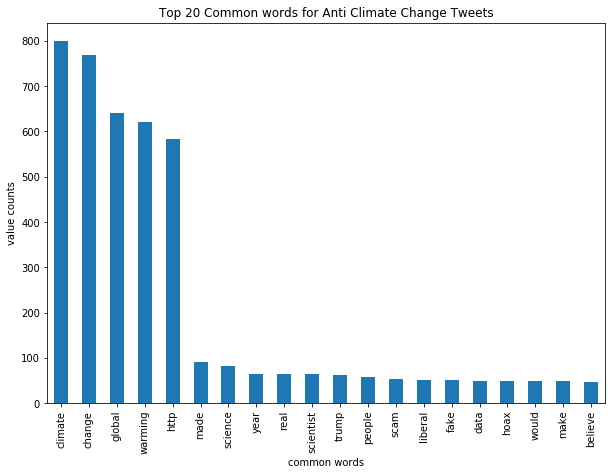

In [ ]:
plt.figure(figsize=(10, 7))
anti_series.plot.bar()
plt.xlabel('common words')
plt.ylabel('value counts')
plt.title('Top 20 Common words for Anti Climate Change Tweets')
plt.show()

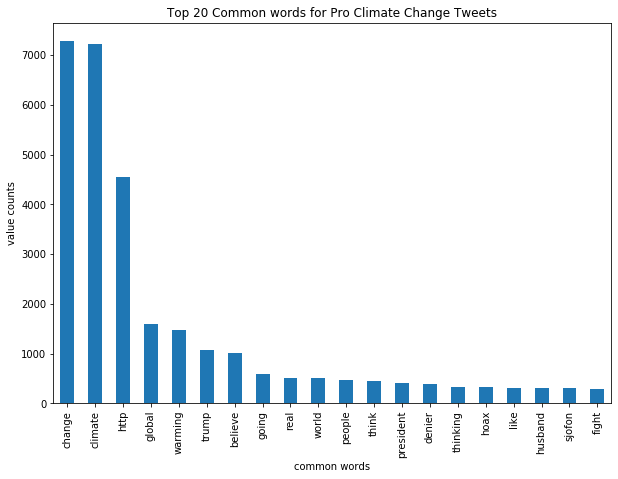

In [ ]:
# top 20 most appearing words for the pro climate change class(sentiment=1)
plt.figure(figsize=(10, 7))
pro_series.plot.bar()
plt.xlabel('common words')
plt.ylabel('value counts')
plt.title('Top 20 Common words for Pro Climate Change Tweets')
plt.show()

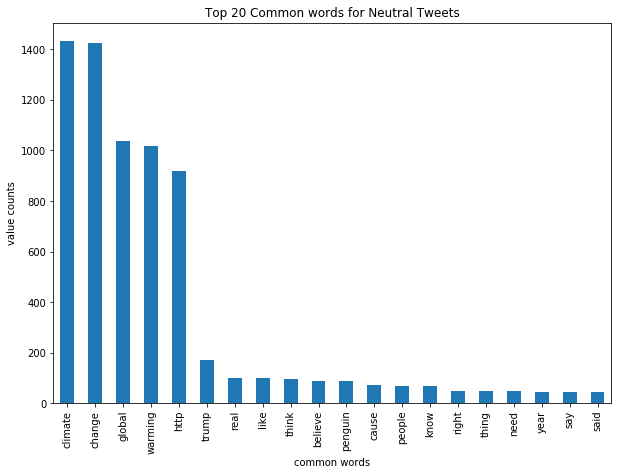

In [ ]:
# top 20 most appearing words for the neutral climate change class(sentiment=0)
plt.figure(figsize=(10, 7))
neutral_series.plot.bar()
plt.xlabel('common words')
plt.ylabel('value counts')
plt.title('Top 20 Common words for Neutral Tweets')
plt.show()

#### Observations


* There still is an overlap of frquently tweeted words btween the categories

* We will investigate the hashtags assciated with each category, to see if there is any difference.

### Extracting hashtags

Extracting the hashtags will help interms of having insights with regards to which words where commonly used while people where tweeting about climate change. From there, there will  be a clear understanding of whom believe in climate change and who dont not.

In [ ]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtags from pro climate change tweets

HT_pro = hashtag_extract(df_train['message'][df_train['sentiment'] == 1])

# extracting hashtags from anti climate change tweets
HT_anti = hashtag_extract(df_train['message'][df_train['sentiment'] == -1])

#extracting hashtags from neutral tweets
HT_neutral = hashtag_extract(df_train['message'][df_train['sentiment'] == 0])
# unnesting list
HT_pro = sum(HT_pro,[])
HT_anti = sum(HT_anti,[])
HT_neutral= sum(HT_neutral,[])

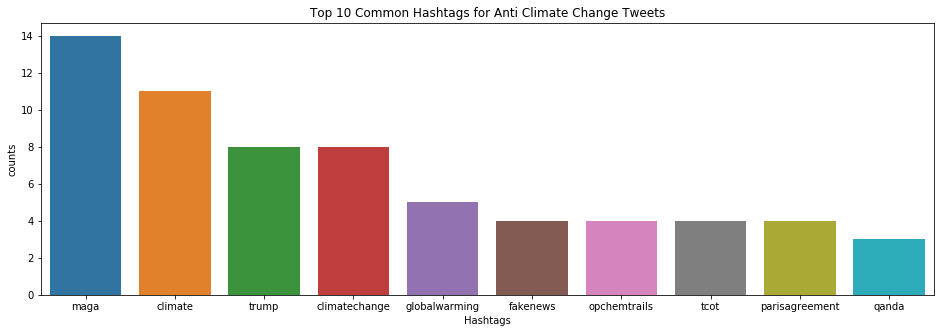

In [ ]:
a = nltk.FreqDist(HT_anti)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags    
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d, x='Hashtag',y = "Count")
plt.xlabel('Hashtags')
plt.ylabel('counts')
plt.title('Top 10 Common Hashtags for Anti Climate Change Tweets')
plt.show()

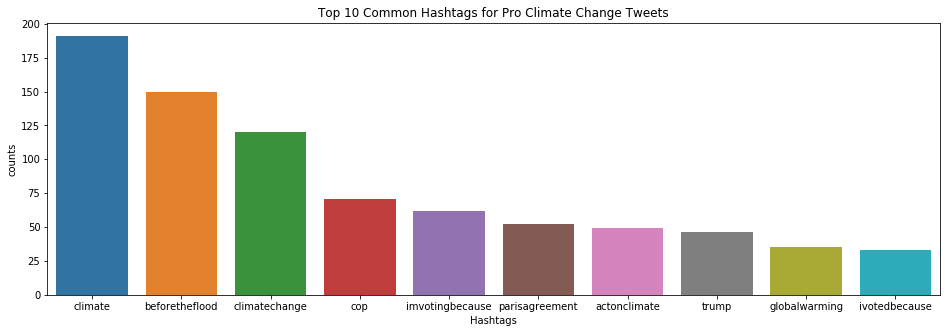

In [ ]:
a = nltk.FreqDist(HT_pro)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d, x='Hashtag',y = "Count")
plt.xlabel('Hashtags')
plt.ylabel('counts')
plt.title('Top 10 Common Hashtags for Pro Climate Change Tweets')
plt.show()

#### Observations


*   Climate and change common for pro, anti and neutral tweets.
However, extracting hashtags does show a difference/distinction between the tweet classes.
*   Pro climate change tweets have a high number of 'before the flood' hashtags which is for a documentary that is about climate change.

*   Anti climate change tweets are frequented by the 'maga' hashtags, which stands for Make America Great Again, a slogan used by President Donald Trump in his election campaign. President Trump has been quoted saying that climate change is a hoax.
*   We will keep the hashtags because they will help the model to learn better to differentiate between a pro tweet and an anti climate change tweet.


# Text Feature Extraction

## Word2Vec

We have seen that hashtags provide more insights into whether a tweet is pro or anti climate change. Next, we want to explore this further by using word2vec to investigate words that go together with the most frequent hashtags and the relatedness thereof, in terms of the words being negative or positive in this climate change belief context.

**word2vec**
Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located close to one another in the space.

**TSNE**
TSNE Works by taking a group of high-dimensional (# of dimensions via Word2Vec) vocabulary word feature vectors, then compresses them down to 2-dimensional x,y coordinate pairs. In order to group similar words (as per corpus model) located close to one another on the plane, while maximizing the distance between dissimilar words as per trained model corpus.

In [ ]:
#remove hashtags 
df_train.message = df_train.message.apply(lambda x: re.sub('\W',' ',x))
df_train.message = df_train.message.apply(lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","",x))

In [ ]:
#function to build a library of words from the cleaned tweets
def build_corpus(data):
    corpus = []
    for column in ['message']:
        for sentence in df_train[column].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(df_train)

In [ ]:
corpus[0:5]

[['polyscimajor',
  'chief',
  'think',
  'carbon',
  'dioxide',
  'main',
  'cause',
  'global',
  'warming',
  'wait',
  'http',
  'yelvcefxkc'],
 ['like', 'lack', 'evidence', 'anthropogenic', 'global', 'warming'],
 ['',
  'todayinmaker',
  '',
  'wired',
  'pivotal',
  'year',
  'climate',
  'change',
  'http',
  'wotxtlcd'],
 ['racist',
  'sexist',
  'climate',
  'change',
  'denying',
  'bigot',
  'leading',
  'poll',
  '',
  'electionnight'],
 ['worth',
  'read',
  'whether',
  'believe',
  'climate',
  'change',
  'http',
  'gglzvnyjun',
  'http']]

In [ ]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=100, workers=4)
model.wv['beforetheflood']

array([-0.10574956,  0.22399457,  0.07561714,  0.19156452, -0.22770782,
        0.47059396,  0.3110852 , -0.07943912,  0.5952825 ,  0.26395914,
       -0.13432974,  0.39392743,  0.1312945 , -0.05071328,  0.19290568,
       -0.02673876, -0.30166525, -0.21997084, -0.1202014 ,  0.19137982,
       -0.23233344, -0.24525413,  0.62826675,  0.0399227 , -0.369166  ,
       -0.10087332, -0.13895239,  0.15406443,  0.04259115, -0.346735  ,
       -0.05859427, -0.3354835 , -0.11082319,  0.47010323,  0.01954696,
       -0.11229237,  0.02994365, -0.1804174 , -0.1521936 ,  0.4374973 ,
        0.22679785, -0.12192321,  0.06986468, -0.00369134, -0.07356722,
        0.10946709, -0.13414808, -0.4274003 ,  0.00530672, -0.05619436,
        0.07661796, -0.17398986, -0.04656684,  0.16858178,  0.18614799,
        0.28927702, -0.03029206, -0.4028697 ,  0.20979086, -0.5621771 ,
        0.24022166, -0.0687884 , -0.2195405 , -0.08864979,  0.17550018,
       -0.2133481 , -0.08043782, -0.21661995, -0.4526342 , -0.16

In [ ]:
#function to create TSNE model, and plot the word vectors
def tsne_plot(model):
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\ramuk\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


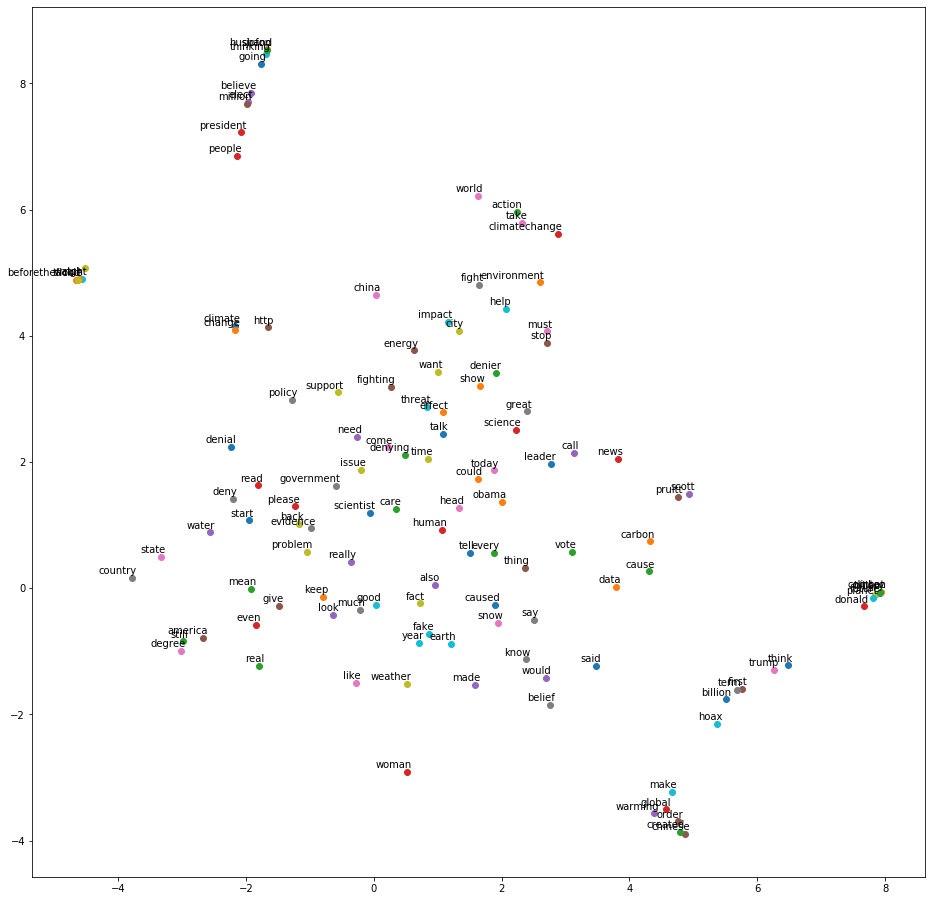

In [ ]:
tsne_plot(model)

In [ ]:
words= model.most_similar('beforetheflood')

C:\Users\ramuk\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
df = pd.DataFrame(words, columns =['word', 'Similarity_score']) 
  
print(df)

            word  Similarity_score
0         tackle          0.994062
1          watch          0.986139
2          right          0.974808
3                         0.944686
4         action          0.901488
5  climatechange          0.892190
6           take          0.877630
7          world          0.874522
8    environment          0.805268
9          woman          0.795047


### Observations


*   From the tsne model depiction, we can see that the word2vec model has succesfully grouped closer together words with the same context, before the flood is a documentary presented by Leonardo DiCaprio which aims to educate about climate change and the effects of global warming. Similar words to before the flood are words such as take, action, cop (a world leaders conference to address climate change).
*   We can also see that words such as hoax, whic is a term a non believer would use are much farther from the word before the flood.
*   However, the tsne model can be difficult to read as the word vectors become clumped together. We then created a similarity score dataframe to show the similarity scores of the related words.
*   This shows that the words contained within the tweets we are going to use to train our model really do have a pattern amongst themselves which is either synonymous with believing or disbelieving in climate change.

## N-Grams

**Bi-Grams**

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
frequent_words = get_top_n_words(df_train['message'][df_train['sentiment'] == 1], 20)
for word, freq in frequent_words:
    print(word, freq)
df2 = pd.DataFrame(frequent_words, columns = ['text' , 'count'])
grouped= df2.groupby('text').sum()['count'].sort_values(ascending=False)


climate change 7229
global warming 1449
change http 1167
believe climate 705
change denier 324
husband believe 309
thinking going 308
going husband 308
http sjofon 307
change real 272
fight climate 214
president elect 203
change hoax 200
donald trump 193
warming http 178
elect believe 174
warming real 148
think climate 146
million people 139
people going 132


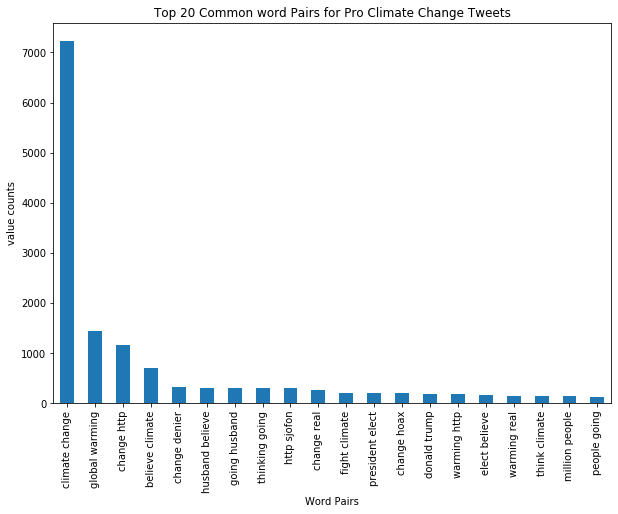

In [ ]:
plt.figure(figsize=(10, 7))
grouped.plot.bar()
plt.xlabel('Word Pairs')
plt.ylabel('value counts')
plt.title('Top 20 Common word Pairs for Pro Climate Change Tweets')
plt.show()

##### Anti climate change tweets

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
frequent_words = get_top_n_words(df_train['message'][df_train['sentiment'] == -1], 20)
for word, freq in frequent_words:
    print(word, freq)
df2 = pd.DataFrame(frequent_words, columns = ['text' , 'count'])
grouped=df2.groupby('text').sum()['count'].sort_values(ascending=False)

climate change 753
global warming 613
change http 50
warming http 45
made climate 38
made global 32
change real 29
concept global 25
warming created 25
created chinese 25
make manufacturing 25
chinese order 24
order make 24
manufacturing competitive 22
warming data 19
warming climate 18
data http 18
world leader 18
leader duped 18
manipulated global 18


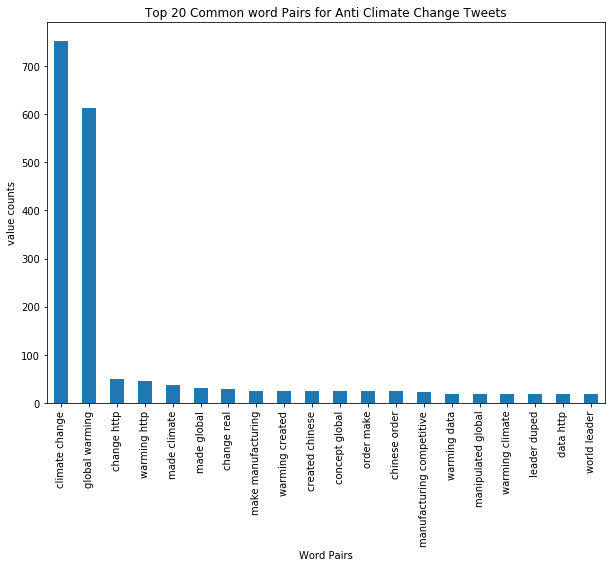

In [ ]:
plt.figure(figsize=(10, 7))
grouped.plot.bar()
plt.xlabel('Word Pairs')
plt.ylabel('value counts')
plt.title('Top 20 Common word Pairs for Anti Climate Change Tweets')
plt.show()

### Observations

*   Investigating top 20 most common words didn't paint a clear picture since we saw quite a significant overlap in the common words among the different classes.
*   We then opted to investigate pairs of common words using N-grams.
*   Pairs of common words do make a bit more sense as compared to investigating single common words.



# Feature Engineering

#### Defining Variables

In [ ]:
X=df_train['message']
y= df_train['sentiment']
unseen_data = df_test['message']

In [ ]:
X

0        polyscimajor chief think carbon dioxide main c...
1          like lack evidence anthropogenic global warming
3         todayinmaker  wired pivotal year climate chan...
4        racist sexist climate change denying bigot lea...
5        worth read whether believe climate change http...
                               ...                        
15813    head falsely claim carbon emission cause globa...
15814    took material global warming lgbt right health...
15816    notiven nytimesworld trump actually believe cl...
15817    liberal climate change crap hoax tie  agenda c...
15818     climate change equation screenshots http uufcxdq
Name: message, Length: 12179, dtype: object

In [ ]:
y

0        1
1        1
3        1
4        1
5        1
        ..
15813    1
15814    1
15816    0
15817   -1
15818    0
Name: sentiment, Length: 12179, dtype: int64

In [ ]:
unseen_data

0        europe looking china make sure alone fighting ...
1        combine polling staffer climate change woman r...
2        scary unimpeachable evidence climate change al...
3        putin jill trump believe climate change think ...
4        female orgasm cause global warming sarcastic r...
                               ...                        
10541    writing poem climate change #climatechange #sc...
10542    year climate change came home hottest year rec...
10543    pacific country positive fiji leading global c...
10544          must cause global warming #aldublaboroflove
10545    climate change global issue getting worse eati...
Name: message, Length: 10546, dtype: object

## Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2, random_state=42)


## Building the model Via  pipeline 

##### Brief explanation of parameters and the TF-IDF vectorizer

* **TF-IDF vectorizer** converts raw texts to a matrix of TD-IDF features that could be understood by a computational language

* **ngram_range** is the number of words in a sequence

* **max_df** Removing the data values that appearing most frequently

* **min_df**  Removing terms that are appearing less frequently




##### 1.Logistic Regression 
Logistic regression is a powerful machine learning algorithm that utilizes a sigmoid function and works best on binary and it can also be performed in multi class function. In this case the Logistic Regression classifer is  used in a multi-class problem. The Logistic Regression classifier is used within a pipeline with different parameters.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
text_clf = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 2))),
                     ('clf',LogisticRegression()),
])
# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

C:\Users\ramuk\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_sc

In [ ]:
predictions = text_clf.predict(X_test)

In [ ]:
#from unseen data
y_pred = text_clf.predict(unseen_data)

In [ ]:
from sklearn import metrics 
print(metrics.confusion_matrix(y_test,predictions))

[[  73   29  154]
 [   7  192  294]
 [   8   36 1643]]


In [ ]:
#Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.90      0.97      0.93      1712
           1       0.97      0.89      0.93      1700

    accuracy                           0.93      3412
   macro avg       0.93      0.93      0.93      3412
weighted avg       0.93      0.93      0.93      3412



In [ ]:
#print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.7832512315270936


#### 2.Linear SVC

The Linear SVC which is also regarded as the soft margin classifier is know for separating hyperplanes that will necessarily give a perfect classification of the training observations, however this could lead to sentivity to individual observations. The reason behind , why this classifier is used is because it is more flexiable in the choise of penalities and loss functions and it scales large samples better.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [ ]:
predictions = text_clf.predict(X_test)

In [ ]:
#from unseen data
y_pred = text_clf.predict(unseen_data)

In [ ]:
from sklearn import metrics 
print(metrics.confusion_matrix(y_test,predictions))

[[ 114   31  111]
 [  24  217  252]
 [  35   82 1570]]


In [ ]:
#Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.66      0.45      0.53       256
           0       0.66      0.44      0.53       493
           1       0.81      0.93      0.87      1687

    accuracy                           0.78      2436
   macro avg       0.71      0.61      0.64      2436
weighted avg       0.76      0.78      0.76      2436



In [ ]:
#print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.7803776683087028


##### 3.SVM
Support Vector Machine (SVM) is a classification method that was developed in the computer scince community in the 1990s. The SVM have shown its capabilities of performing best in different settings and in most times it is considered to be one of the best classifiers. The objective of the SVM in this case is to find the a hyperplane in an N-dimensional space(N- the number of features) that distinctly classifies the data points.The ovo and rbf kernel was used , because it allows the SVC to fit a non-linear decision boundary 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
text_clf = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 2))),
                     ('clf', svm.SVC(decision_function_shape='ovo')),
])
# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovo'

In [ ]:
predictions = text_clf.predict(X_test)

In [ ]:
#from unseen data
y_pred = text_clf.predict(unseen_data)

In [ ]:
from sklearn import metrics 
print(metrics.confusion_matrix(y_test,predictions))

[[  61   15  180]
 [   1  159  333]
 [   4   27 1656]]


In [ ]:
#Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.92      0.24      0.38       256
           0       0.79      0.32      0.46       493
           1       0.76      0.98      0.86      1687

    accuracy                           0.77      2436
   macro avg       0.83      0.51      0.57      2436
weighted avg       0.79      0.77      0.73      2436



In [ ]:
#print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.7701149425287356


##### svc 
The Linear SVC which is also regarded as the soft margin classifier is know for separating hyperplanes that will necessarily give a perfect classification of the training observations, however this could lead to sentivity to individual observations. The reason behind , why this classifier is used is because it is more flexiable in the choise of penalities and loss functions and it scales large samples better. The rbf kernel which allows the SVC to fit a non-linear decision boundary.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
text_clf = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 2))),
                     ('clf', SVC(kernel='rbf')),
])
# Feed the training data through the pipeline
text_clf.fit(X_train, y_train) 

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr'

In [ ]:
predictions = text_clf.predict(X_test)

In [ ]:
#from unseen data
y_pred = text_clf.predict(unseen_data)

In [ ]:
from sklearn import metrics 
print(metrics.confusion_matrix(y_test,predictions))

[[  61   15  180]
 [   1  159  333]
 [   4   27 1656]]


In [ ]:
#Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.92      0.24      0.38       256
           0       0.79      0.32      0.46       493
           1       0.76      0.98      0.86      1687

    accuracy                           0.77      2436
   macro avg       0.83      0.51      0.57      2436
weighted avg       0.79      0.77      0.73      2436



In [ ]:
#print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.7701149425287356


## Observations for Unbalanced data

Four different models were trained, namely the logistic regression, SVC linear  and SVM.
All these models were fitted into a pipe line with a TfidfVectorizer, and they are behaved differently looking at the accuracy score that they have given us.Based on the accuracy score that was obtained, the model that perfomed best is the logistics regression classifier with an accuracy of 0.783.


## Building a model with balanced data

As it was stated in one of the previous sections that the data is unbalanced and there is also the possiblity that it could affect the quality of the results, it was then decided that the process of of building the data will be perfomed with the balanced data to solve that unbalanced issue.

Inorder to solve that problem, the method of resampling the data was then implemented, inorder to have a better a well informed decision.

Resampling method is an indispensable recipe in modern statistics, this recipe includees repeatedly drawing samples from training sets and refitting the model of the fitted model.In this instance  the upscaling the minority class method will be implemented, to make sure that the Anti-climate change tweets match up with the Pro-climate change.

Upscaling method is the process where the minority classes (Anti) is repetedly randmonly sampled  until the number of minority class is matching the number of majority class.

In [ ]:
#Separate minority and majority classes
df_majority = df_train[(df_train.sentiment==1) |
                      (df_train.sentiment==0) | 
                      (df_train.sentiment ==2)]
df_minority = df_train[df_train.sentiment == -1]

#Upsample minority class
df_minority_upsampled= resample(df_minority,replace= True,
                            n_samples= 4000, random_state =42) #sample with replacement

#Combine majority class with upsampled minority class
df_upsampled = pd.concat ([df_majority,
                          df_minority_upsampled])
#Display new class counts
df_upsampled.sentiment.value_counts()

 1    8530
-1    4000
 0    2353
Name: sentiment, dtype: int64

### Distribution of classes after Upsampling 

Text(0.5, 1.0, 'Tweet message distribution over the sentiments')

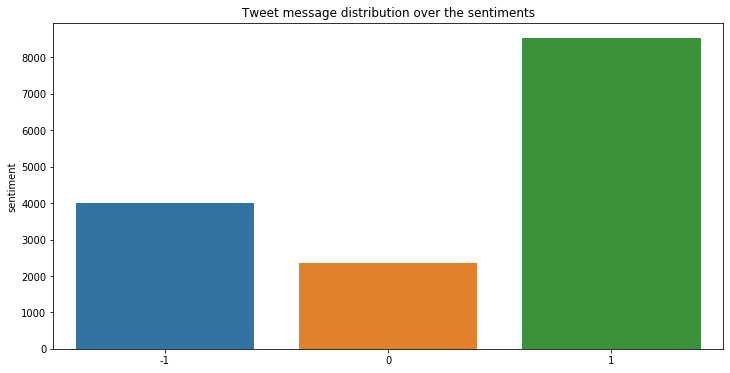

In [ ]:
# message  Distribution ove the classes
dist_class = df_upsampled['sentiment'].value_counts()
labels = ['1', '2','0','-1']

fig, (ax1 )= plt.subplots(1, figsize=(12,6))

sns.barplot(x=dist_class.index, y=dist_class, ax=ax1).set_title("Tweet message distribution over the sentiments")

##### Defining the upsampled variables 

In [ ]:
#Independent Feature of the train dataframe
X=df_upsampled['message']
#Dependent feature of the train dataframe
y= df_upsampled['sentiment']
#Independent feature of the test dataframe
unseen_data = df_test['message']

###### Splitting the dataset

In [ ]:
#Splitting the train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

##### Logistic Regression Model (Upsampled data)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
text_clf = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 2))),
                     ('clf',LogisticRegression()),
])
# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

C:\Users\ramuk\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_sc

In [ ]:
predictions = text_clf.predict(X_test)

In [ ]:
#from unseen data
y_pred = text_clf.predict(unseen_data)

In [ ]:
from sklearn import metrics 
print(metrics.confusion_matrix(y_test,predictions))

[[332   1  32]
 [ 29  87 130]
 [ 27  20 831]]


In [ ]:
#Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.86      0.91      0.88       365
           0       0.81      0.35      0.49       246
           1       0.84      0.95      0.89       878

    accuracy                           0.84      1489
   macro avg       0.83      0.74      0.75      1489
weighted avg       0.84      0.84      0.82      1489



In [ ]:
#print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.8394895903290799


#### 2.Linear SVC

In [ ]:
from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [ ]:
predictions = text_clf.predict(X_test)

In [ ]:
#from unseen data
y_pred = text_clf.predict(unseen_data)

In [ ]:
from sklearn import metrics 
print(metrics.confusion_matrix(y_test,predictions))

[[348   4  13]
 [ 24 101 121]
 [ 22  53 803]]


In [ ]:
#Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.88      0.95      0.92       365
           0       0.64      0.41      0.50       246
           1       0.86      0.91      0.88       878

    accuracy                           0.84      1489
   macro avg       0.79      0.76      0.77      1489
weighted avg       0.83      0.84      0.83      1489



In [ ]:
#print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.8408327736736064


##### 3.SVM

In [ ]:
from sklearn import svm
text_clf = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 2))),
                     ('clf', svm.SVC(decision_function_shape='ovo')),
])
# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovo'

In [ ]:
predictions = text_clf.predict(X_test)

In [ ]:
#from unseen data
y_pred = text_clf.predict(unseen_data)

In [ ]:
from sklearn import metrics 
print(metrics.confusion_matrix(y_test,predictions))

[[345   2  18]
 [  8  78 160]
 [  5  17 856]]


In [ ]:
#Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.96      0.95      0.95       365
           0       0.80      0.32      0.45       246
           1       0.83      0.97      0.90       878

    accuracy                           0.86      1489
   macro avg       0.87      0.75      0.77      1489
weighted avg       0.86      0.86      0.84      1489



In [ ]:
#print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.8589657488247145


NameError: name 'confusion_matrix' is not defined

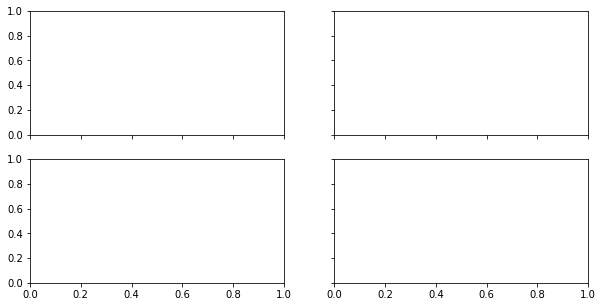

In [ ]:
def plot_cnf_matrix(pred):
    fig, ax = plt.subplots(ncols=2,nrows=2,sharex=True,sharey=True,figsize=(10,5))
    sns.heatmap(confusion_matrix(y_train.anti,pred[:,0]),annot=True,ax=ax[0,0],cbar=False)
    sns.heatmap(confusion_matrix(y_train.pro,pred[:,1]),annot=True,ax=ax[0,1],cbar=False)
    sns.heatmap(confusion_matrix(y_train.neutral,pred[:,2]),annot=True,ax=ax[1,0],cbar=False)
    ax[0,0].set_title('Anti')
    ax[0,1].set_title('Pro')
    ax[1,0].set_title('neutral')
    plt.suptitle('Confusion metrics for predictions on train data')
plot_cnf_matrix(text_clf)


In [ ]:
A=df_test.set_index('tweetid')   
B= A.index

In [ ]:
Final_Submission ={'tweetid': B,'sentiment': np.round(y_pred,0)}

In [ ]:
Submission =pd.DataFrame(data=Final_Submission)

In [ ]:
Submission =Submission[['tweetid','sentiment']]

In [ ]:
Submission.set_index('tweetid')

,sentiment
tweetid,
169760,1
35326,1
224985,1
476263,1
872928,0
...,...
895714,1
875167,1
78329,1


In [ ]:
Submission.to_csv('ClimateChange.csv', index=False)

#### SVC

In [ ]:
from sklearn.svm import SVC
text_clf = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 2))),
                     ('clf', SVC(kernel='rbf')),
])
# Feed the training data through the pipeline
text_clf.fit(X_train, y_train) 

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr'

In [ ]:
predictions = text_clf.predict(X_test)

In [ ]:
#from unseen data
y_pred = text_clf.predict(unseen_data)

In [ ]:
from sklearn import metrics 
print(metrics.confusion_matrix(y_test,predictions))

[[345   2  18]
 [  8  78 160]
 [  5  17 856]]


In [ ]:
#Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.96      0.95      0.95       365
           0       0.80      0.32      0.45       246
           1       0.83      0.97      0.90       878

    accuracy                           0.86      1489
   macro avg       0.87      0.75      0.77      1489
weighted avg       0.86      0.86      0.84      1489



In [ ]:
#print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.8589657488247145


# Conclusion

What is the best model? why?
which model perfomed the worst?why?
What else could be done in future to improve overall  perfomance?